# 18기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.
데이터셋 출처 :  https://www.kaggle.com/datasets/shenba/time-series-datasets

### Box-Jenkins 방법론
대략적 흐름 예시를 확인하고 싶다면 첨부한 '시계열자료_참고자료.pdf'를 읽어주세요.

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
df.DATE = pd.to_datetime(df.DATE)

In [ ]:
#날짜를 index로 설정한다
df = df.set_index("DATE")
df.columns = ['electric production']
df.head()

,electric production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df.index.freq = 'MS'

##Box-Jenkins 방법론</br>
1. **모형 식별** : 주어진 데이터의 ACF, PACF를 관찰하고 해당 데이터에 어떤 모형을 적합시키면 좋을지 여러가지 모형의 후보들을 만든다</br>
2. **모수 추정** : 1번에서 도출된 여러가지 모형의 최적의 모수값을 추정한다. 이 때, 최소제곱법, 최대 우도법을 사용한다.</br>
3. **모형 적합성 진단** : 여러가지 모형들 중 어떤 모형이 적합한 지 각 모형의 잔차 그래프를 살펴보면서 검정하고 최종 적합 모형을 선정한다.</br>
4. **미래값 예측** : 3번 단계에서 최종 선정한 모형을 이용해 주어진 데이터의 미래값을 예측한다


###모형 식별

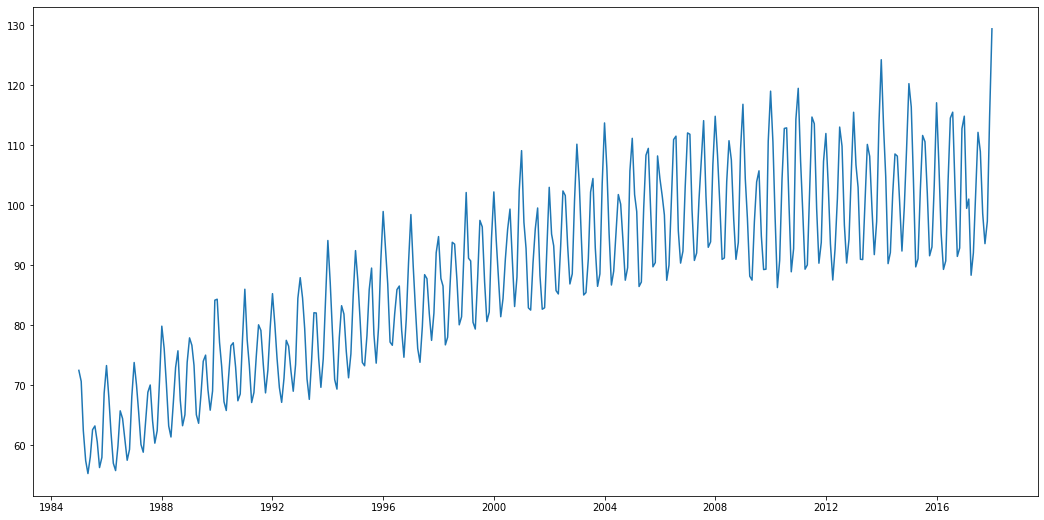

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["electric production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show()

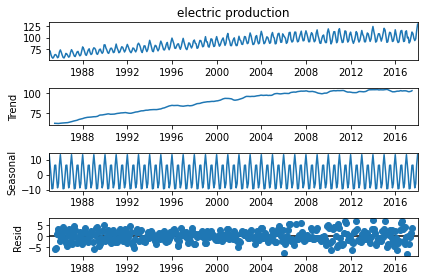

In [ ]:
a = seasonal_decompose(df["electric production"], model = "add")
a.plot();

seaononal decomposition 함수를 이용하여 데이터에서 trend, seasonal, residual을 분리해 시각화를 수행한 결과.</br>
추세 그래프를 통해 데이터가 증가하고 있으며, 계절 그래프를 통해 데이터가 주기를 가지고 있고, 예측그래프를 통해 평균이 0이고 분산이 어느정도 일정한 것을 확인할 수 있다.</br>
이러한 그래프들을 통해 해당 데이터가 정상데이터가 아니라는 것을 시각적으로 확인 가능하다

In [ ]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['electric production'].dropna())
print(f'ADF Statistics:{result[0]}')
print(f'p-value:{result[1]}')

ADF Statistics:-2.2569903500472366
p-value:0.18621469116587053


ADF(Augmented Dickey FUller)test의 결과를 봤을 때 p-value가 0.05보다 높은 것을 확인할 수 있다. 이는 해당 시계열이 95%의 신뢰도로 비정상데이터라는 것을 뜻한다.

In [ ]:
result=adfuller(df['electric production'].diff().dropna())
print(f'ADF Statistics:{result[0]}')
print(f'p-value:{result[1]}')

ADF Statistics:-7.104890882267309
p-value:4.0777865655394705e-10


차분을 통해 데이터를 정상화 한 후의 ADF test 결과는 다음과 같다. 그 결과 데이터의 p-value가 0.01보다 낮으므로 해당 시계열은 정상 시계열이라고 볼 수 있다.

####ACF, PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


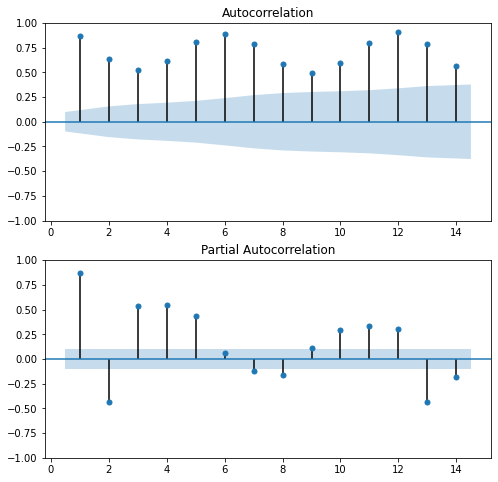

In [ ]:
fig, (ax1, ax2)=plt.subplots(2,1,figsize=(8,8))

plot_acf(df,lags=14, zero=False, ax=ax1)
plot_pacf(df,lags=14, zero=False, ax=ax2)
plt.show()

### 최적의 모형 찾기 및 모수 추정

In [ ]:
!pip install pmdarima.arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pmdarima.arima (from versions: none)
ERROR: No matching distribution found for pmdarima.arima


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from pmdarima.arima import auto_arima
import math
import pmdarima as pm

In [ ]:
results=pm.auto_arima(df, d=1, start_p=1, start_q=1, max_p=5, max_q=5,
                    seasonal=True, m=6, D=1, start_P=1, start_Q=1, max_P=2, max_Q=2, information_criterion='aic', trace=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1912.925, Time=1.23 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2404.500, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=1998.731, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2057.803, Time=0.52 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2000.250, Time=0.97 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.81 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1880.044, Time=1.06 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=inf, Time=2.42 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=1925.181, Time=0.70 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=1942.791, Time=0.56 sec
 ARIMA(2,1,1)(2,1,1)[6]             : AIC=1881.313, Time=1.65 sec
 ARIMA(1,1,2)(2,1,1)[6]             : AIC=1880.682, Time=1.35 sec
 ARIMA(0,1,0)(2,1,1)[6]             : AIC=1955.485, T

가장 적합한 모수 추정을 위해 d는 1로 고정하고, p, q에 대하여 grid search를 수행하였다.</br>
탐색 결과, p=2, q=2일 때 AIC가 가장 적게 나오는 것을 확인할 수 있었다.


In [ ]:
model=SARIMAX(df,order=(2,1,2),  seasonal_order=(1, 1, 2, 6))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:               electric production   No. Observations:                  397
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -899.089
Date:                           Sun, 21 Aug 2022   AIC                           1814.177
Time:                                   06:20:44   BIC                           1845.907
Sample:                               01-01-1985   HQIC                          1826.755
                                    - 01-01-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0873      0.350     -0.249      0.803      -0.773       0.599
ar.L2          0.2828      0.214      1.321      0.187      -0.137       0.702
ma.L1         -0.2982      0.337     -0.884      0.377      -0.959       0.363
ma.L2         -0.6397      0.329     -1.944      0.052      -1.285       0.005
ar.S.L6       -0.9976      0.003   -380.207      0.000      -1.003      -0.992
ma.S.L6        0.1145      0.040      2.832      0.005       0.035       0.194
ma.S.L12      -0.7764      0.037    -20.853      0.000      -0.849      -0.703
sigma2         5.5549      0.307     18.092      0.000       4.953       6.157
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                42.26
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(2, 1, 2)(1, 1, 2, 6)로 구축된 모델의 AIC는 1814.177이다.

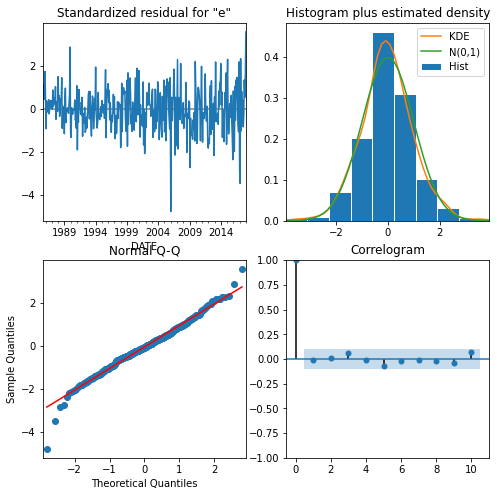

In [ ]:
results.plot_diagnostics(figsize=(8,8))
plt.show()

4개의 그래프 결과를 통해 해당 SARIMA 모델이 주어진 시계열에 잘 적합함을 알 수 있다.

###미래값 예측

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
prediction = results.get_prediction(start=-24)
mean_prediction=prediction.predicted_mean
mean_prediction = mean_prediction.rename("prediction")

In [ ]:
confi_int_p=prediction.conf_int()
lower_limits_p=confi_int_p.iloc[:,0]
upper_limits_p=confi_int_p.iloc[:,1]

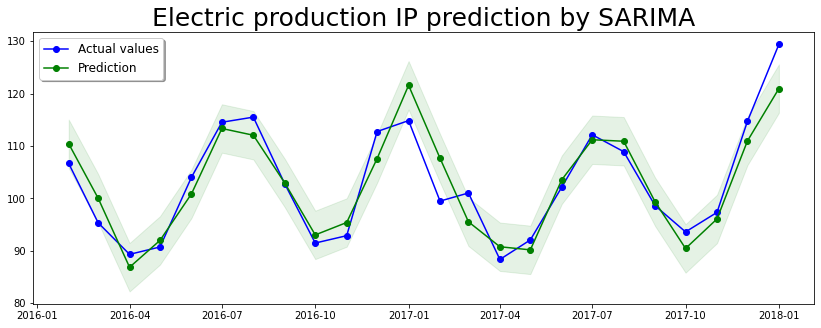

In [ ]:
plt.figure(figsize=(14,5))
plt.title("Electric production IP prediction by SARIMA", fontsize=25)

plt.plot(df[-24:].index,df[-24:].values, label='Actual values', color="blue", marker="o")

plt.plot(mean_prediction[-24:].index, mean_prediction[-24:].values,label='Prediction', color="green", marker="o")
plt.fill_between(mean_prediction[-24:].index, lower_limits_p, upper_limits_p, alpha=0.1, color="green")

plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
# plt.ylabel('Industrial Production (IP) index', fontsize=15)
plt.show()

표를 보면, 신뢰구간 안에 거의 대부분의 예측값들이 잘 들어오는 것을 확인할 수 있다.

In [ ]:
from math import sqrt

def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

모델의 성능을 통계적으로 측정하기 위해 MAPE(Mean Absolute Percentage Error)를 구하는 함수를 정의한다. MAPE의 식은 다음과 같다</br>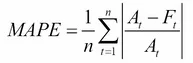

In [ ]:
mape_sarima = mape(df.iloc[-24:,0],mean_prediction)
print(f"MAPE OF ARIMA MODEL : {mape_sarima:.2f} %")

rmse_sarima = sqrt(mean_squared_error(df[-24:].values,mean_prediction.values))
print(f"RMSE OF ARIMA MODEL : {rmse_sarima:.2f}")

MAPE OF ARIMA MODEL : 3.02 %
RMSE OF ARIMA MODEL : 3.87


In [ ]:
mean_prediction

DATE
2016-02-01    110.429286
2016-03-01    100.043109
2016-04-01     86.867033
2016-05-01     91.993725
2016-06-01    100.872828
2016-07-01    113.348949
2016-08-01    112.060267
2016-09-01    102.934425
2016-10-01     93.037975
2016-11-01     95.404618
2016-12-01    107.617111
2017-01-01    121.587306
2017-02-01    107.675214
2017-03-01     95.540130
2017-04-01     90.778748
2017-05-01     90.182027
2017-06-01    103.563327
2017-07-01    111.200766
2017-08-01    110.914696
2017-09-01     99.347160
2017-10-01     90.451130
2017-11-01     96.084715
2017-12-01    110.968023
2018-01-01    120.963727
Freq: MS, Name: prediction, dtype: float64

Forecasting

In [ ]:
#SARIMA Forecast

forecast = results.get_forecast(steps=12)
mean_forecast=forecast.predicted_mean
mean_forecast = mean_forecast.rename("prediction")

In [ ]:
confi_int_f=forecast.conf_int()
lower_limits_f=confi_int_f.iloc[:,0]
upper_limits_f=confi_int_f.iloc[:,1]

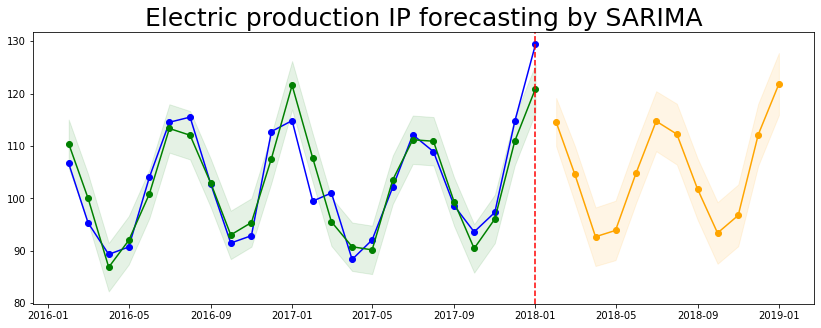

In [ ]:
plt.figure(figsize=(14,5))
plt.title("Electric production IP forecasting by SARIMA", fontsize=25)

plt.plot(df[-24:].index,df[-24:].values, label='Actual values', color="blue", marker="o")

plt.plot(mean_prediction[-24:].index, mean_prediction[-24:].values,label='Prediction', color="green", marker="o")
plt.fill_between(mean_prediction[-24:].index, lower_limits_p, upper_limits_p, alpha=0.1, color="green")

plt.axvline(df.index[-1], color="red", linestyle="--")

plt.plot(mean_forecast[-24:].index,mean_forecast[-24:].values, label='Forecast', color="orange", marker="o")
plt.fill_between(mean_forecast[-24:].index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.show()